In [9]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pandas as pd
from keras.utils.np_utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.datasets import mnist
import itertools
import random

import sys
sys.path.append('../')
from Core_Functions import multi_hot_encoding
from sklearn.model_selection import train_test_split

In [11]:
# Randomly select a defined number of image paires from a given dataset
def get_left_min_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_combination_data = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Merge images TODO: this could be a function with several options
        combined_images = np.hstack((image_A, image_B))
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        if label_A < label_B:
            # Merge images TODO: this could be a function with several options
            combined_images = np.hstack((image_A, image_B))
            image_combination_data.append(combined_images)
            image_combination_labels.append([min(label_A, label_B), max(label_A,label_B)])
        elif label_A > label_B: 
            # Merge images TODO: this could be a function with several options
            combined_images = np.hstack((image_B, image_A))
            image_combination_data.append(combined_images)
            image_combination_labels.append([min(label_A, label_B), max(label_A,label_B)])
        # Here we want to exclude the images where they are the same on both sides

        
        
    # Convert image data and labels lists to numpy arrays
    image_combination_data = np.array(image_combination_data)
    image_combination_labels = np.array(image_combination_labels)
    
    return image_combination_data, image_combination_labels

In [12]:
# Randomly select a defined number of image paires from a given dataset
def get_right_min_image_combinations(number_image_pairs_selected, image_data, image_labels):
    
    num_images_total = len(image_labels)
    
    image_combination_data = []
    image_combination_labels = []
    
    for i in range(number_image_pairs_selected):
        
        # Draw two image indices from a uniform random distribution
        random_index_A = random.randint(0, num_images_total-1)
        random_index_B = random.randint(0, num_images_total-1)
        
        # Randomly choose two images from the dataset
        image_A = image_data[random_index_A]
        image_B = image_data[random_index_B]
        
        # Merge images TODO: this could be a function with several options
        combined_images = np.hstack((image_A, image_B))
        
        # Find the minimum between the two labels
        label_A = image_labels[random_index_A]
        label_B = image_labels[random_index_B]
        minimum_label = min(label_A, label_B)
        
        if label_A < label_B:
            # Merge images TODO: this could be a function with several options
            combined_images = np.hstack((image_B, image_A))
            # Append newly generated image combination and minimum label to list
            image_combination_data.append(combined_images)
            image_combination_labels.append([min(label_A, label_B), max(label_A,label_B)])
        elif label_A > label_B: 
            # Merge images TODO: this could be a function with several options
            combined_images = np.hstack((image_A, image_B))
            # Here we want to exclude the images where they are the same on both sides
            # Append newly generated image combination and minimum label to list
            image_combination_data.append(combined_images)
            image_combination_labels.append([min(label_A, label_B), max(label_A,label_B)])
            

        
        
    # Convert image data and labels lists to numpy arrays
    image_combination_data = np.array(image_combination_data)
    image_combination_labels = np.array(image_combination_labels)
    
    return image_combination_data, image_combination_labels

In [13]:
# Load data and split into training and test
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
# Split training set further into training and validation sets
sample_size = 40000
X_train, X_val, y_train, y_val = train_images[:sample_size], train_images[sample_size:sample_size*2],  train_labels[:sample_size], train_labels[sample_size:sample_size*2]

In [15]:
combo_train_X, combo_train_y = get_left_min_image_combinations(40000, X_train, y_train)
combo_val_X, combo_val_y = get_right_min_image_combinations(20000, X_val, y_val)

In [16]:
# Reshape the data so they can be fed into the network, one-hot-encode the labels

train_images = combo_train_X.reshape((combo_train_X.shape[0], 28* 56))
train_images = train_images/ 255

val_images = combo_val_X.reshape((combo_val_X.shape[0], 28* 56))
val_images = val_images/255


In [19]:
combo_train_y.shape

(35860, 2)

In [20]:
# Here instead of using to_categorical, I use my custom multi-hot encoding
"""
train_labels = to_categorical(combo_train_y)
val_labels = to_categorical(combo_val_y)
"""

train_labels = np.array(multi_hot_encoding.multi_hot_encode(combo_train_y))
val_labels =  np.array(multi_hot_encoding.multi_hot_encode(combo_val_y))

In [21]:
# Experiment parameters

num_epochs = 5
num_iterations = 5

In [22]:
# Model architecture
def build_DNN():

    inputs = keras.Input(shape=(28* 56,))

    dense = layers.Dense(512, activation="relu")
    x = dense(inputs)

    outputs = layers.Dense(10, "sigmoid")(x)
    
    model = keras.Model(inputs = inputs,
                       outputs = outputs)

    model.compile(
        loss=keras.losses.BinaryCrossentropy(),
        optimizer=keras.optimizers.RMSprop(),
        metrics=["accuracy", "mae"],
    )

    return model

In [23]:
DNN_model = build_DNN()
DNN_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1568)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               803328    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 808,458
Trainable params: 808,458
Non-trainable params: 0
_________________________________________________________________


In [29]:


DNN_model.fit(train_images, 
          train_labels, 
          epochs = 20, 
          batch_size = 64)



Epoch 1/20
561/561 [==============================] - 2s 3ms/step - loss: 0.0010 - accuracy: 0.7898 - mae: 7.8863e-04
Epoch 2/20
561/561 [==============================] - 2s 3ms/step - loss: 7.0391e-04 - accuracy: 0.8092 - mae: 5.9451e-04
Epoch 3/20
561/561 [==============================] - 2s 3ms/step - loss: 6.3012e-04 - accuracy: 0.8269 - mae: 4.9290e-04
Epoch 4/20
561/561 [==============================] - 2s 3ms/step - loss: 5.4167e-04 - accuracy: 0.8422 - mae: 4.2201e-04
Epoch 5/20
561/561 [==============================] - 2s 3ms/step - loss: 4.2228e-04 - accuracy: 0.8558 - mae: 3.1217e-04
Epoch 6/20
561/561 [==============================] - 2s 3ms/step - loss: 2.8965e-04 - accuracy: 0.8622 - mae: 2.3778e-04
Epoch 7/20
561/561 [==============================] - 2s 3ms/step - loss: 2.4193e-04 - accuracy: 0.8781 - mae: 1.8670e-04
Epoch 8/20
561/561 [==============================] - 2s 3ms/step - loss: 1.7309e-04 - accuracy: 0.8855 - mae: 1.4311e-04
Epoch 9/20
561/561 [========

In [30]:
# Print loss, mae and accuracy
DNN_eval_model = DNN_model.evaluate(val_images, val_labels)
DNN_eval_model

565/565 [==============================] - 1s 1ms/step - loss: 23.4337 - accuracy: 0.0037 - mae: 0.4577


[23.433746337890625, 0.0037121169734746218, 0.457720011472702]

In [18]:
# Interesting that the DNN is slightly better than the CNN at this task

<BarContainer object of 2 artists>

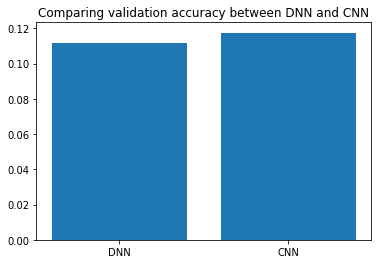

In [29]:
# PLotting
plt.title('Comparing validation accuracy between DNN and CNN')
plt.bar(['DNN','CNN'], [DNN_eval_model[1],CNN_eval_model[1]])